# Prediction of User Ratings by Analyzing Reviews

## Naive Bayes Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from nltk import pos_tag
from nltk.stem import PorterStemmer
%matplotlib inline

### Data import

We are importing the dataset called "fileterd_yelp1.csv" which is a filtered version of yelp_review.csv which has 5.4 million entries. We applied the filter of having greater than 65 upvotes.


In [2]:
data = pd.read_csv('filtered_yelp1.csv')
print(data.shape)
print(data.info())
data

(7996, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 10 columns):
Unnamed: 0     7996 non-null int64
review_id      7996 non-null object
user_id        7996 non-null object
business_id    7996 non-null object
stars          7996 non-null int64
date           7996 non-null object
text           7996 non-null object
useful         7996 non-null int64
funny          7996 non-null int64
cool           7996 non-null int64
dtypes: int64(5), object(5)
memory usage: 624.8+ KB
None


,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,568,0aJKuQSkxt4Gep-e2R6Zlg,dyhTHLIf6eWBvU78Y3T06A,BuJfxizrE5ZFZgOl2EHRKg,3,2008-02-19,"I'm a non-traditional girlfriend, so I always ...",15,27,24
1,4255,und_IbRFr2Rwpizt-kfZuw,Hm0diOkWwpo9zotlJlqMUQ,upgjUq616Yz1IvAvysDLWA,5,2017-09-08,Great food!\r\n\r\nThis restaurant isn't locat...,47,25,40
2,4259,gDxR9hgRWhp6jtZqgozqRA,Hm0diOkWwpo9zotlJlqMUQ,3fdtp-bzoE4ZgTakkcEBzQ,5,2017-09-14,Welcome to Fabulous Las Vegas!\r\n\r\nLas Vega...,33,20,35
3,4260,OboK9wH0IzH1IZryGFSgRQ,Hm0diOkWwpo9zotlJlqMUQ,BEtgRzNeXGAf0uQ-HuSyfA,5,2017-11-29,Delicious Ramen!\r\n\r\nRandomly found this pl...,35,19,35
4,4263,rH_hl29D7FX0xBVrfa9edA,Hm0diOkWwpo9zotlJlqMUQ,q3dJQtwZQrrurNT-1bNKgQ,5,2016-03-05,"Lunch at the Don's...\r\n\r\nWell, that's what...",28,18,23
5,4266,5guvjGIo7nQiatQg2-U_kg,Hm0diOkWwpo9zotlJlqMUQ,bvow46stEejfxnnqEKTAyQ,4,2017-11-25,Taste of Las Vegas!\r\n\r\nWe visited on Thank...,30,14,30
6,4267,fDtMRtHmnhm-YmYGLzxfrg,Hm0diOkWwpo9zotlJlqMUQ,X91rjC4EkH_3ZGY3ciIs8Q,4,2017-09-04,"Great Place, Yummy desserts!\r\n\r\nThis was m...",32,15,32
7,4268,WfmVQyAgAqkxkOfz9lSgpQ,Hm0diOkWwpo9zotlJlqMUQ,uu5AtMrz_94e8kk4Gixg9Q,4,2017-12-05,mmm! halo halo :)\r\n\r\nCame to this area on ...,37,18,36
8,4269,F30SpbMNX4u1JonzwtRT9Q,Hm0diOkWwpo9zotlJlqMUQ,n0SSApg8pIMu9uWr7IvxcQ,4,2016-11-10,I know it's rare but...\r\n\r\nAfter being let...,26,15,26
9,4270,yD_zR37iwd_zqonHEhnjTg,Hm0diOkWwpo9zotlJlqMUQ,I6ICIIZfZsp_J9hHmfhWhQ,4,2017-09-09,Parking fees in casinos on the Strip\r\n\r\nLo...,49,25,43


In [3]:
data = data.drop('Unnamed: 0', axis = 1)
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 9 columns):
review_id      7996 non-null object
user_id        7996 non-null object
business_id    7996 non-null object
stars          7996 non-null int64
date           7996 non-null object
text           7996 non-null object
useful         7996 non-null int64
funny          7996 non-null int64
cool           7996 non-null int64
dtypes: int64(4), object(5)
memory usage: 562.3+ KB
None


,stars,useful,funny,cool
count,7996.000000,7996.000000,7996.000000,7996.000000
mean,3.804027,50.640320,33.935468,34.538894
std,1.292684,82.129376,48.349958,26.679894
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,29.000000,19.000000,24.000000
50%,4.000000,36.000000,24.000000,30.000000
75%,5.000000,51.000000,35.000000,41.000000
max,5.000000,3364.000000,1481.000000,1105.000000


In [11]:
# Establishing the corelation between useful, funny and cool

stars = data.groupby("text").mean()
stars.corr()

,stars,useful,funny,cool
stars,1.000000,-0.236949,-0.022682,0.145416
useful,-0.236949,1.000000,0.493364,0.561606
funny,-0.022682,0.493364,1.000000,0.426372
cool,0.145416,0.561606,0.426372,1.000000


The correction above shows the relation betweeen cool, funny and useful features and the ratings(star) of the review. As seen here, there is not much corelation between these features to be included in the regression model as features.  

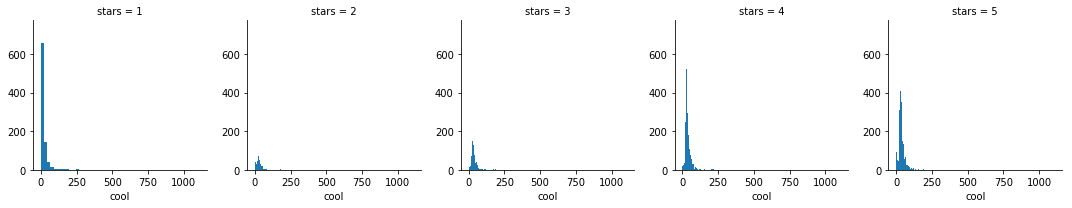

In [13]:
g = sns.FacetGrid(data=data, col='stars')
g.map(plt.hist, 'cool', bins=50)

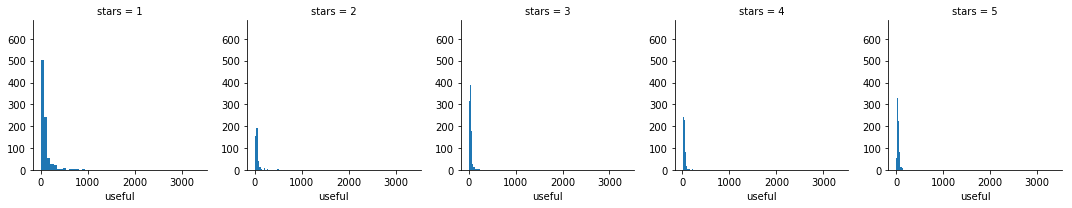

In [14]:
g = sns.FacetGrid(data=data, col='stars')
g.map(plt.hist, 'useful', bins=50)

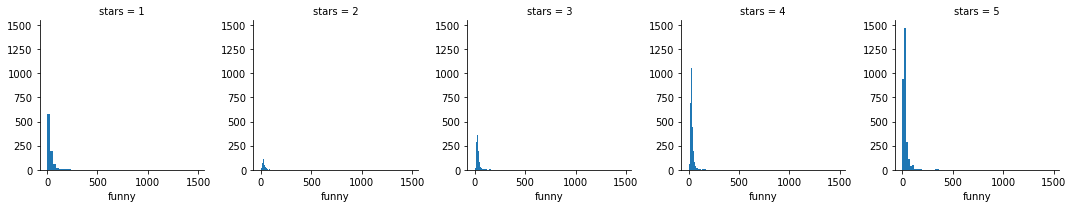

In [15]:
g = sns.FacetGrid(data=data, col='stars')
g.map(plt.hist, 'funny', bins=50)

The above three graphs show the counts of funny, useful and cool features and their counts according to different ratings. The noticable thing about the reviews is there are various reviews which are have very few upvotes(funny, useful or cool).

Another thing that needs to be taken into consideration is the uneven distribution of reviews to the perticular rating. 4 and 5 have the maximum upvotes whereas 2, 3 have the least upvotes.

In [16]:
X = data['text']
Y = data['stars']

In [17]:
Xdata = np.array(X)
Ydata = np.array(Y)

### Text Processes

In [18]:
# Just Stopwords removal
import string

def text_process1(text):
    nopunc = [char for char in text if char not in string.punctuation] #removes punctuations
    nopunc = ''.join(nopunc)
    wordLIst = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #removes stop words
    return wordLIst

In [19]:
# stemmer
import string

def text_process2(text):
    stemmer = PorterStemmer()
    nopunc = [char for char in text if char not in string.punctuation] #removes punctuations
    nopunc = ''.join(nopunc)
    wordLIst = [stemmer.stem(word.lower()) for word in nopunc.split() if word.lower() not in stopwords.words('english')] #Apply stemmer
    return wordLIst

In [20]:
# pos tagging + stemmer 
import string

def text_process3(text):
    stemmer = PorterStemmer()
    nopunc = [char for char in text if char not in string.punctuation] #removes punctuations
    nopunc = ''.join(nopunc)
    wordLIst = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #removes stop words
    dictTag = pos_tag(wordLIst)
    adj_preceders = [a for (a, b) in dictTag if (b == 'JJ' or b == 'RB' or b == 'VB')]
    return [stemmer.stem(adj_word.lower()) for adj_word in adj_preceders]

In [21]:
print(text_process1(Xdata[0]))

['Im', 'nontraditional', 'girlfriend', 'always', 'forget', 'whats', 'expected', 'conventional', 'gift', 'giving', 'holidays', 'like', 'Valentines', 'Day', 'year', 'totally', 'neglected', 'get', 'Mr', 'Man', 'much', 'card', 'Dog', 'house', 'thought', 'werent', 'celebrating', 'know', 'little', 'sneaker', 'would', 'bring', 'smile', 'face', 'cutesy', 'cheesy', 'tchotchky', 'gift', 'card', 'combo', 'Little', 'know', 'ace', 'sleeve', 'ace', 'lots', 'lots', 'titacular', 'action', 'Bombshells', 'know', 'nothing', 'brings', 'smile', 'Mr', 'Mans', 'face', 'quicker', 'pair', 'boobies', 'stopped', 'Sunday', 'sinful', 'indulgence', 'illusionary', 'atmosphere', 'nontraditionalist', 'doesnt', 'bad', 'thing', 'Sundays', '2', '1', 'well', 'drinks', 'domestic', 'bottles', '7', 'pm', 'nice', '775', 'short', 'gin', 'tonic', 'Theres', 'also', 'cover', 'indication', 'Sunday', 'nudity', 'lures', 'guys', 'reminiscent', 'dad', 'Expect', 'gentlemen', 'kahki', 'shorts', 'button', 'shirts', 'paying', 'lady', 'rub

In [22]:
print(text_process2(Xdata[0]))

['im', 'nontradit', 'girlfriend', 'alway', 'forget', 'what', 'expect', 'convent', 'gift', 'give', 'holiday', 'like', 'valentin', 'day', 'year', 'total', 'neglect', 'get', 'mr', 'man', 'much', 'card', 'dog', 'hous', 'thought', 'werent', 'celebr', 'know', 'littl', 'sneaker', 'would', 'bring', 'smile', 'face', 'cutesi', 'cheesi', 'tchotchki', 'gift', 'card', 'combo', 'littl', 'know', 'ace', 'sleev', 'ace', 'lot', 'lot', 'titacular', 'action', 'bombshel', 'know', 'noth', 'bring', 'smile', 'mr', 'man', 'face', 'quicker', 'pair', 'boobi', 'stop', 'sunday', 'sin', 'indulg', 'illusionari', 'atmospher', 'nontraditionalist', 'doesnt', 'bad', 'thing', 'sunday', '2', '1', 'well', 'drink', 'domest', 'bottl', '7', 'pm', 'nice', '775', 'short', 'gin', 'tonic', 'there', 'also', 'cover', 'indic', 'sunday', 'nuditi', 'lure', 'guy', 'reminisc', 'dad', 'expect', 'gentlemen', 'kahki', 'short', 'button', 'shirt', 'pay', 'ladi', 'rub', 'bit', 'least', 'gent', 'better', 'busi', 'twentysometh', 'watch', 'entir

In [23]:
print(text_process3(Xdata[0]))

['nontradit', 'alway', 'forget', 'convent', 'total', 'neglect', 'much', 'werent', 'know', 'littl', 'bring', 'smile', 'combo', 'know', 'titacular', 'sin', 'atmospher', 'nontraditionalist', 'bad', 'well', 'domest', 'pm', 'nice', 'short', 'tonic', 'also', 'guy', 'reminisc', 'entir', 'pretti', 'easi', 'good', 'get', 'enthusiast', 'especi', 'chang', 'total', 'knew', 'ole', 'fake', 'usual', 'au', 'natur', 'will', 'interest', 'blank', 'allbusi', 'even', 'girl', 'asid', 'awkward', 'awkward', 'get', 'suprem', 'sexi', 'instead', 'perfunctori', 'titti', 'lecher', 'lap', 'italian', 'extra', 'mayb', 'harsh', 'whole', 'regular']


### Apply Count Vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=text_process2).fit(Xdata)

In [28]:
len(vectorizer.vocabulary_)

41163

In [30]:
Xdata1 = vectorizer.transform(Xdata)

In [31]:
print(Xdata1.shape,Xdata1.nnz)

(7996, 41163) 882763


### Multinomial NB

In [81]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

### Experiment 1

In this experiment, we experiment on different values of alpha i.e. the learning rate for the Naïve bayes classifier. The values tested are 0.1, 1, 3 and 10 and accuracy and the evaluation matrices are obtained. This is also a place where we count vectorize and split the data for training and testing purposes in 80% and 20% respectively. We also oversampled the data for better results as discuss above.

In [73]:
vectorizer = CountVectorizer(analyzer=text_process2).fit(Xdata)
len(vectorizer.vocabulary_)
XdataEx1 = vectorizer.transform(Xdata)
print(XdataEx1.shape, XdataEx1.nnz)

(7996, 41163) 882763


In [170]:
X_train_Ex1, X_test_Ex1, Y_train_Ex1, Y_test_Ex1 = train_test_split(XdataEx1, Ydata, test_size=0.2, random_state=101)

In [171]:
X_resampledEx1, Y_resampledEx1 = SMOTE().fit_sample(X_train_Ex1, Y_train_Ex1)
X_resampledEx1.shape

(11795, 41163)

In [229]:
# first model
nb_model1 = MultinomialNB(alpha = 0.1)
nb_model1.fit(X_resampledEx1, Y_resampledEx1)
prediction1 = nb_model1.predict(X_test_Ex1)

cnf_1 = confusion_matrix(Y_test_Ex1, prediction1)
print("confusion matrix for alpha = 0.1\n", cnf_1)
print('\n')
print("Classification report for alpha = 0.1\n", classification_report(Y_test_Ex1, prediction1))
print("Accuracy in % for alpha = 0.1 is ",accuracy_score(Y_test_Ex1, prediction1)*100)

tpArray1, fpArray1 = CalCorrectClassifiedForEachClass(cnf_1)

confusion matrix for alpha = 0.1
 [[136   9  10  11   3]
 [ 22   6  21  18   3]
 [ 14   8  64 108  29]
 [ 15   5  54 302 149]
 [ 69   8  21 201 314]]


Classification report for alpha = 0.1
              precision    recall  f1-score   support

          1       0.53      0.80      0.64       169
          2       0.17      0.09      0.11        70
          3       0.38      0.29      0.33       223
          4       0.47      0.58      0.52       525
          5       0.63      0.51      0.57       613

avg / total       0.51      0.51      0.50      1600

Accuracy in % for alpha = 0.1 is  51.375


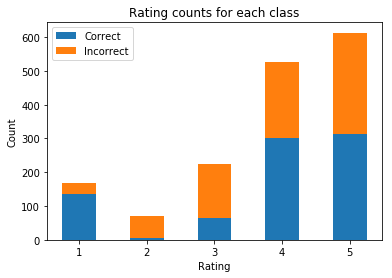

In [230]:
N = 5
menMeans = tpArray1
womenMeans = fpArray1

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating counts for each class')
plt.xticks(ind, ('1', '2', '3', '4', '5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

In [231]:
# second model
nb_model2 = MultinomialNB(alpha = 1)
nb_model2.fit(X_resampledEx1, Y_resampledEx1)
prediction2 = nb_model2.predict(X_test_Ex1)

cnf_2 = confusion_matrix(Y_test_Ex1, prediction2)
print("confusion matrix for alpha = 1\n", cnf_2)
print('\n')
print("Classification report for alpha = 1\n", classification_report(Y_test_Ex1, prediction2))
print("Accuracy in % for alpha = 1 is ",accuracy_score(Y_test_Ex1, prediction2)*100)

tpArray2, fpArray2 = CalCorrectClassifiedForEachClass(cnf_2)

confusion matrix for alpha = 1
 [[137  11   9   9   3]
 [ 23  10  19  15   3]
 [ 15   9  60 114  25]
 [ 19  10  43 331 122]
 [ 79  10  13 218 293]]


Classification report for alpha = 1
              precision    recall  f1-score   support

          1       0.50      0.81      0.62       169
          2       0.20      0.14      0.17        70
          3       0.42      0.27      0.33       223
          4       0.48      0.63      0.55       525
          5       0.66      0.48      0.55       613

avg / total       0.53      0.52      0.51      1600

Accuracy in % for alpha = 1 is  51.9375


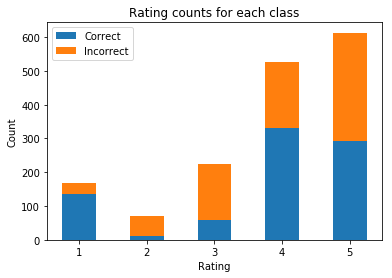

In [232]:
N = 5
menMeans = tpArray2
womenMeans = fpArray2

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating counts for each class')
plt.xticks(ind, ('1', '2', '3', '4', '5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

In [233]:
# third model
nb_model3 = MultinomialNB(alpha = 3)
nb_model3.fit(X_resampledEx1, Y_resampledEx1)
prediction3 = nb_model3.predict(X_test_Ex1)

cnf_3 = confusion_matrix(Y_test_Ex1, prediction3)
print("confusion matrix for alpha = 3\n", cnf_3)
print('\n')
print("Classification report for alpha = 3\n", classification_report(Y_test_Ex1, prediction3))
print("Accuracy in % for alpha = 3 is ",accuracy_score(Y_test_Ex1, prediction3)*100)

tpArray3, fpArray3 = CalCorrectClassifiedForEachClass(cnf_3)

confusion matrix for alpha = 3
 [[133  10   7  13   6]
 [ 24   7  10  26   3]
 [ 16   4  27 153  23]
 [ 20   2  15 371 117]
 [ 72   4   6 234 297]]


Classification report for alpha = 3
              precision    recall  f1-score   support

          1       0.50      0.79      0.61       169
          2       0.26      0.10      0.14        70
          3       0.42      0.12      0.19       223
          4       0.47      0.71      0.56       525
          5       0.67      0.48      0.56       613

avg / total       0.53      0.52      0.50      1600

Accuracy in % for alpha = 3 is  52.1875


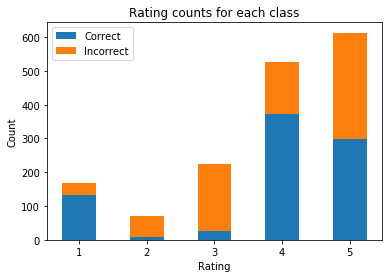

In [234]:
N = 5
menMeans = tpArray3
womenMeans = fpArray3

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating counts for each class')
plt.xticks(ind, ('1', '2', '3', '4', '5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

In [235]:
# fourth model
nb_model4 = MultinomialNB(alpha = 10)
nb_model4.fit(X_resampledEx1, Y_resampledEx1)
prediction4 = nb_model4.predict(X_test_Ex1)

cnf_4 = confusion_matrix(Y_test_Ex1, prediction4)
print("confusion matrix for alpha = 10\n", cnf_4)
print('\n')
print("Classification report for alpha = 10\n", classification_report(Y_test_Ex1, prediction4))
print("Accuracy in % for alpha = 10 is ",accuracy_score(Y_test_Ex1, prediction4)*100)

tpArray, fpArray = CalCorrectClassifiedForEachClass(cnf_4)

confusion matrix for alpha = 10
 [[132   4   3  24   6]
 [ 22   1   1  43   3]
 [ 13   2   3 185  20]
 [ 14   1   3 400 107]
 [ 57   1   1 261 293]]


Classification report for alpha = 10
              precision    recall  f1-score   support

          1       0.55      0.78      0.65       169
          2       0.11      0.01      0.03        70
          3       0.27      0.01      0.03       223
          4       0.44      0.76      0.56       525
          5       0.68      0.48      0.56       613

avg / total       0.51      0.52      0.47      1600

Accuracy in % for alpha = 10 is  51.8125


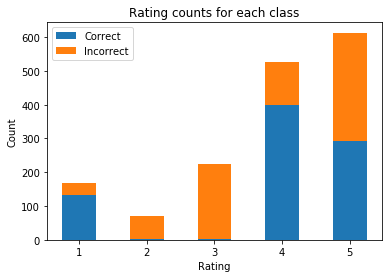

In [236]:
N = 5
menMeans = tpArray
womenMeans = fpArray

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating counts for each class')
plt.xticks(ind, ('1', '2', '3', '4', '5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

### Experiment 2

In this experiment, we experiment on different processing techniques for calculating the values of count vectorizer to be fed as a data for train and test. For this experiment, we are using the text process which removes the punctuation and the stop words from the review. We calculate our count Vector based on this analyzer and then split it for training and testing in 80% and 20% respectively. We also oversample the data for better results as discuss above. Then, we are training and testing the model for the predictions and finally, the accuracy and the evaluation matrix is obtained.

In [257]:
nb_model = MultinomialNB(alpha = 3)

In [33]:
vectorizer = CountVectorizer(analyzer=text_process1).fit(Xdata)
len(vectorizer.vocabulary_)
Xdata1 = vectorizer.transform(Xdata)
print(Xdata1.shape, Xdata1.nnz)

(7996, 68076) 945036


In [258]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(Xdata1, Ydata, test_size=0.2, random_state=101)

In [259]:
X_train_1.shape

(6396, 68076)

In [260]:
from collections import Counter
print(sorted(Counter(Y_train_1).items()))

[(1, 715), (2, 356), (3, 812), (4, 2154), (5, 2359)]


In [261]:
# Oversampling

X_resampled1, Y_resampled1 = SMOTE().fit_sample(X_train_1, Y_train_1)
X_resampled1.shape

(11795, 68076)

In [262]:
from collections import Counter
print(sorted(Counter(Y_resampled1).items()))

[(1, 2359), (2, 2359), (3, 2359), (4, 2359), (5, 2359)]


In [263]:
nb_model.fit(X_resampled1, Y_resampled1)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

In [264]:
predictionEx1 = nb_model.predict(X_test_1)

In [265]:
from sklearn.metrics import confusion_matrix, classification_report

confusionMatrix2 = confusion_matrix(Y_test_1, predictionEx1)
print(confusionMatrix2)
print('\n')
print(classification_report(Y_test_1, predictionEx1))

tpArrayEx2, fpArrayEx2 = CalCorrectClassifiedForEachClass(confusionMatrix2)

[[133   6   4  20   6]
 [ 24   1   7  35   3]
 [ 14   4  15 167  23]
 [ 15   2  11 375 122]
 [ 73   6   4 231 299]]


             precision    recall  f1-score   support

          1       0.51      0.79      0.62       169
          2       0.05      0.01      0.02        70
          3       0.37      0.07      0.11       223
          4       0.45      0.71      0.55       525
          5       0.66      0.49      0.56       613

avg / total       0.51      0.51      0.48      1600



In [266]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test_1, predictionEx1))

0.514375


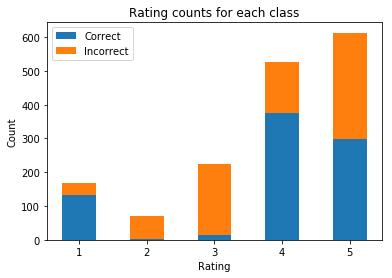

In [267]:
tp2, fp2 = CalCorrectClassified(confusionMatrix2)
(tp2,fp2)

N = 5
menMeans = tpArrayEx2
womenMeans = fpArrayEx2

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating counts for each class')
plt.xticks(ind, ('1', '2', '3', '4', '5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

### Experiment 3

In this experiment, we experiment on different processing techniques for calculating the values of count vectorizer to be fed as a data for train and test. For this experiment, we are using the text process which removes the punctuation and the stop words from the review. After that, the processes also stem the words obtained i.e. it reduces the words to its basic form. We calculate our count Vector based on this analyzer and then split it for training and testing in 80% and 20% respectively. We also oversample the data for better results as discuss above. Then, we train and test the model for the predictions. Finally, the accuracy and the evaluation matrix are obtained.

In [43]:
vectorizer = CountVectorizer(analyzer=text_process2).fit(Xdata)
len(vectorizer.vocabulary_)
Xdata2 = vectorizer.transform(Xdata)
print(Xdata2.shape, Xdata2.nnz)

(7996, 41163) 882763


In [192]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(Xdata2, Ydata, test_size=0.2, random_state=101)

In [193]:
X_train_2.shape

(6396, 41163)

In [194]:
from collections import Counter
print(sorted(Counter(Y_train_2).items()))

[(1, 715), (2, 356), (3, 812), (4, 2154), (5, 2359)]


In [195]:
# Oversampling

X_resampled2, Y_resampled2 = SMOTE().fit_sample(X_train_2, Y_train_2)
X_resampled2.shape

(11795, 41163)

In [196]:
from collections import Counter
print(sorted(Counter(Y_resampled2).items()))

[(1, 2359), (2, 2359), (3, 2359), (4, 2359), (5, 2359)]


In [197]:
nb_model.fit(X_resampled2, Y_resampled2)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

In [198]:
predictionEx2 = nb_model.predict(X_test_2)

In [268]:
from sklearn.metrics import confusion_matrix, classification_report

confusionMatrix3 = confusion_matrix(Y_test_2, predictionEx2)
print(confusionMatrix3)
print('\n')
print(classification_report(Y_test_2, predictionEx2))

tpArrayEx3, fpArrayEx3 = CalCorrectClassifiedForEachClass(confusionMatrix3)

[[135   8   5  16   5]
 [ 25   5  12  26   2]
 [ 16   6  26 151  24]
 [ 22   3  18 376 106]
 [ 80   5   6 232 290]]


             precision    recall  f1-score   support

          1       0.49      0.80      0.60       169
          2       0.19      0.07      0.10        70
          3       0.39      0.12      0.18       223
          4       0.47      0.72      0.57       525
          5       0.68      0.47      0.56       613

avg / total       0.53      0.52      0.49      1600



In [269]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test_2, predictionEx2))

0.52


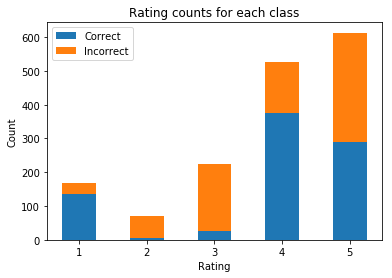

In [271]:
tp3, fp3 = CalCorrectClassified(confusionMatrix3)
(tp3,fp3)

N = 5
menMeans = tpArrayEx3
womenMeans = fpArrayEx3

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating counts for each class')
plt.xticks(ind, ('1', '2', '3', '4', '5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

### Experiment 4

In this experiment, we experiment on different processing techniques for calculating the values of count vectorizer to be fed as a data for train and test. For this experiment, we are using the text process which removes the punctuation and the stop words from the review. The words obtained from the review are then POS tagged.

A POS tagger tags the words based on their part of speech. Here we take only the words which are the adjective, verb and adverb in the review to find their influence. This is then stemmed for the reduction of the word to its basic form. We calculate our count Vector based on this analyzer and then split it for training and testing in 80% and 20% respectively. We also oversample the data for better results as discuss above. Then, we train and test the model for the predictions. Finally, the accuracy and the evaluation matrix are obtained.


In [54]:
vectorizer = CountVectorizer(analyzer=text_process3).fit(Xdata)
len(vectorizer.vocabulary_)
Xdata3 = vectorizer.transform(Xdata)
print(Xdata3.shape, Xdata3.nnz)

(7996, 13602) 253242


In [273]:
from sklearn.model_selection import train_test_split

X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(Xdata3, Ydata, test_size=0.2, random_state=101)

In [274]:
X_train_3.shape

(6396, 13602)

In [275]:
from collections import Counter
print(sorted(Counter(Y_train_3).items()))

[(1, 715), (2, 356), (3, 812), (4, 2154), (5, 2359)]


In [276]:
# Oversampling

X_resampled3, Y_resampled3 = SMOTE().fit_sample(X_train_3, Y_train_3)
X_resampled3.shape

(11795, 13602)

In [277]:
from collections import Counter
print(sorted(Counter(Y_resampled3).items()))

[(1, 2359), (2, 2359), (3, 2359), (4, 2359), (5, 2359)]


In [278]:
nb_model.fit(X_resampled3, Y_resampled3)
predictionEx3 = nb_model.predict(X_test_3)

In [279]:
from sklearn.metrics import confusion_matrix, classification_report

confusionMatrix4 = confusion_matrix(Y_test_3, predictionEx3)
print(confusionMatrix4)
print('\n')
print(classification_report(Y_test_3, predictionEx3))

tpArrayEx4, fpArrayEx4 = CalCorrectClassifiedForEachClass(confusionMatrix4)

[[123  16   3  17  10]
 [ 21   3  16  18  12]
 [ 10  14  27 148  24]
 [ 20   5  26 326 148]
 [ 52   6  10 213 332]]


             precision    recall  f1-score   support

          1       0.54      0.73      0.62       169
          2       0.07      0.04      0.05        70
          3       0.33      0.12      0.18       223
          4       0.45      0.62      0.52       525
          5       0.63      0.54      0.58       613

avg / total       0.50      0.51      0.49      1600



In [280]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test_3, predictionEx3))

0.506875


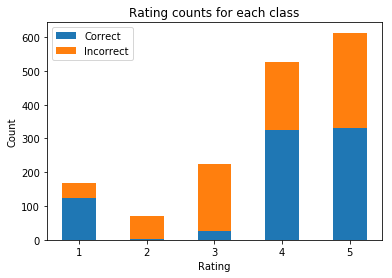

In [281]:
tp4, fp4 = CalCorrectClassified(confusionMatrix4)
(tp4,fp4)

N = 5
menMeans = tpArrayEx4
womenMeans = fpArrayEx4

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating counts for each class')
plt.xticks(ind, ('1', '2', '3', '4', '5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

### Graphs

In [283]:
# Function for calculation of correctly classified and incorrectly classified values
def CalCorrectClassified(theArray):
    tp = 0;
    fp = 0;
    for i in range (theArray.shape[0]):
        for j in range (theArray.shape[1]):
            if (i == j):
                tp = tp + theArray[i][j]
            else:
                fp = fp + theArray[i][j]

    return tp, fp

In [284]:
# Function for calculation of correctly classified and incorrectly classified values for each class
def CalCorrectClassifiedForEachClass(theArray):
    tpArray = []
    fpArray = []
    for i in range (theArray.shape[0]):
        tp = 0;
        fp = 0;
        for j in range (theArray.shape[1]):
            if (i == j):
                tp = tp + theArray[i][j]
            else:
                fp = fp + theArray[i][j]
        
        tpArray.append(tp)
        fpArray.append(fp)

    return tpArray, fpArray

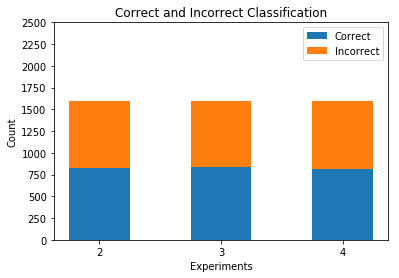

In [285]:
NumberOfExperiment = 3
correct = (tp2, tp3, tp4)
incorrect = (fp2, fp3, fp4)

ind = np.arange(NumberOfExperiment)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, correct, width)
p2 = plt.bar(ind, incorrect, width, bottom=correct)

plt.ylabel('Count')
plt.xlabel('Experiments')
plt.title('Correct and Incorrect Classification')
plt.xticks(ind, ('2', '3', '4'))
plt.yticks(np.arange(0, 2750, 250))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

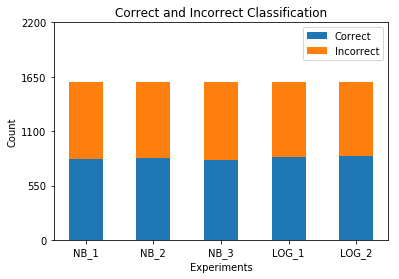

In [288]:
NumberOfFinalExperiment = 5
correct = (tp2, tp3, tp4, 840, 851)
incorrect = (fp2, fp3, fp4, 760, 749)

ind = np.arange(NumberOfFinalExperiment)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, correct, width)
p2 = plt.bar(ind, incorrect, width, bottom=correct)

plt.ylabel('Count')
plt.xlabel('Experiments')
plt.title('Correct and Incorrect Classification')
plt.xticks(ind, ('NB_1', 'NB_2', 'NB_3', 'LOG_1', 'LOG_2'))
plt.yticks(np.arange(0, 2750, 550))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()